In [1]:
# Installation and imports of necessary packages
# !pip install pandas
# !pip install seaborn
# !pip install openpyxl
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load the data set
df  = pd.read_excel('/Users/arjunkhatiwada/Documents/master_project_code/mp_cp_ak/e_commerce_dataset.xlsx',sheet_name='E Comm')
df_eda = df.copy()

In [3]:
# print the first five rows
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
# Checking info including data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
# Checking descriptive statistics of dataset
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
#Checking if data has duplicate entries
df[df.duplicated()].count()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [7]:
#Checking missing values
missing_values = df.isnull().sum()
missing_values

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter and show only the columns with missing values and percentage of missing with respect the total number of rows in the dataset
missing_columns = round(missing_values[missing_values > 0]*100/df.shape[0],2)
missing_columns

Tenure                         4.69
WarehouseToHome                4.46
HourSpendOnApp                 4.53
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
dtype: float64

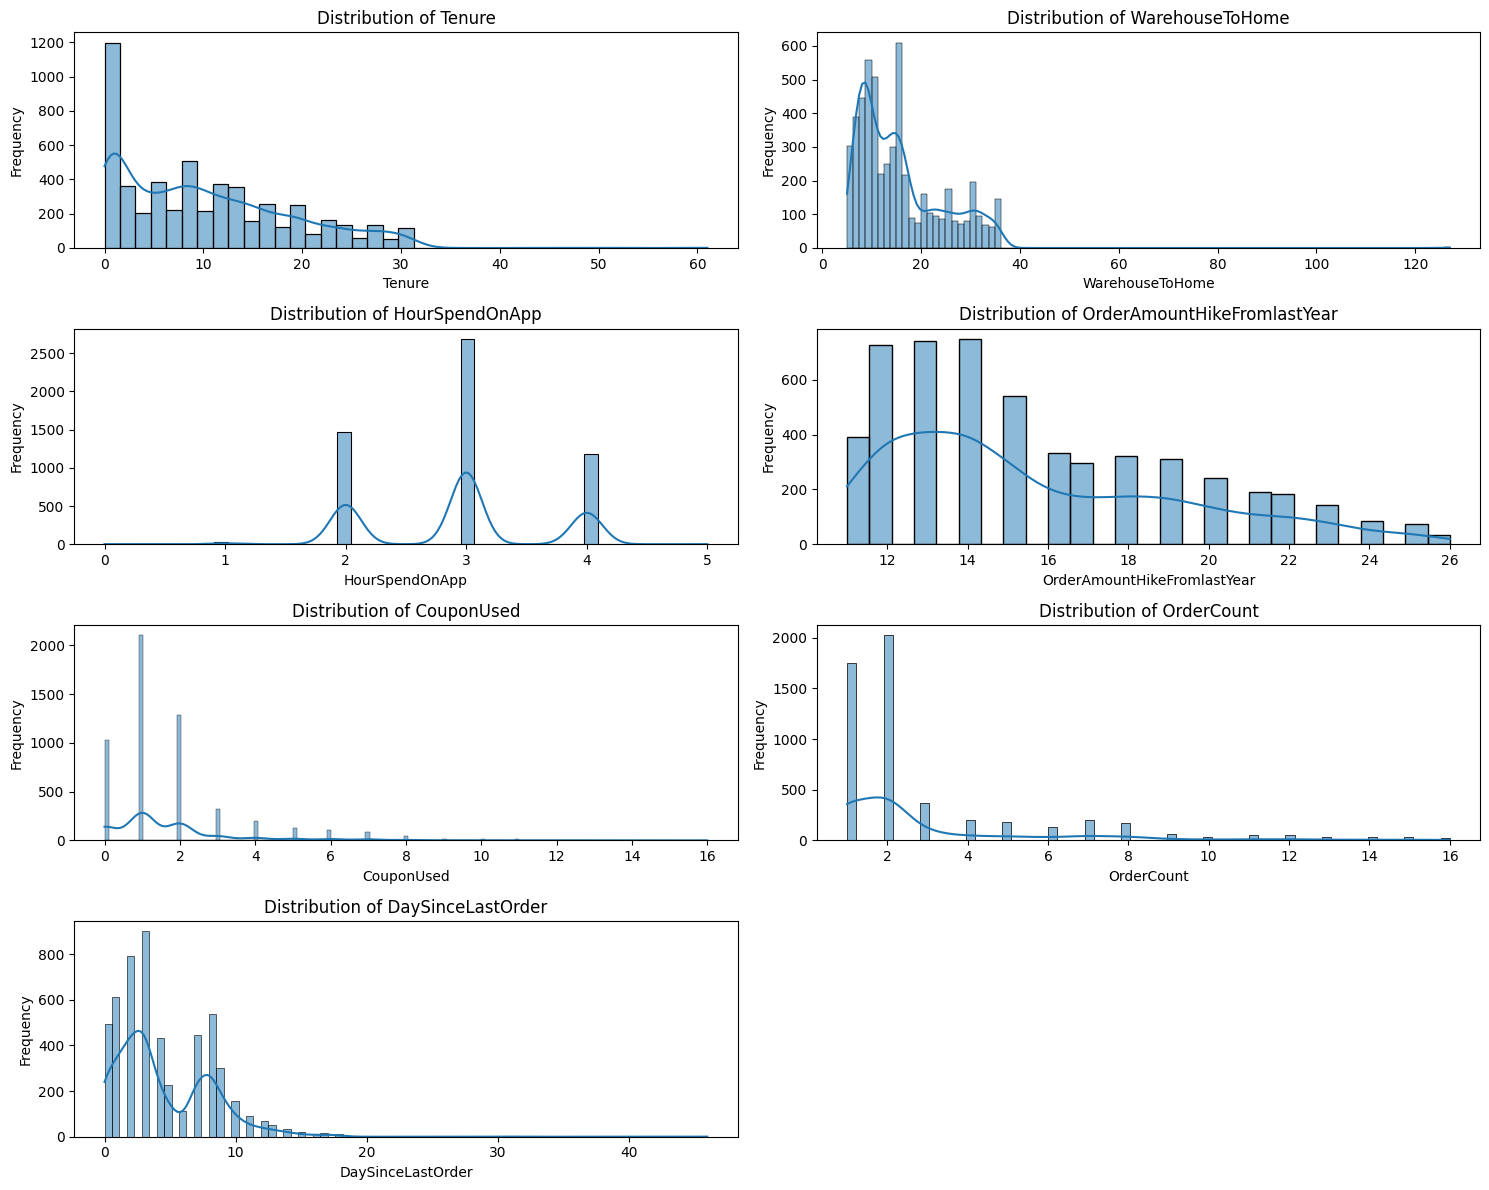

In [9]:
# List of columns with missing values
columns_with_missing = list(missing_columns.index)

# Set up the figure size for plotting
plt.figure(figsize=(15, 12))

# Loop through each column and plot the histogram
for i, col in enumerate(columns_with_missing, 1):
    plt.subplot(4, 2, i)  # Create a subplot grid
    sns.histplot(df[col], kde=True)  # Plot the histogram with KDE (Kernel Density Estimate)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

None of the histograms have a bell shape (i.e., none of the distributions are normally distributed), it means the data is likely skewed or contains outliers. In this case, using the median for imputing missing values would be the safest approach for most of the columns.

In [10]:
# Impute missing values with median for all columns
for col in columns_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

In [11]:
#Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [12]:
# Checking the distribution of the target variable (Churn)
print(df['Churn'].value_counts())

# To see the percentage distribution
print(df['Churn'].value_counts(normalize=True) * 100)


Churn
0    4682
1     948
Name: count, dtype: int64
Churn
0    83.161634
1    16.838366
Name: proportion, dtype: float64


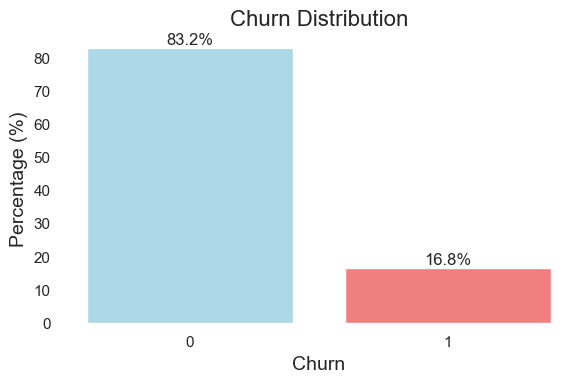

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your existing DataFrame with a column named 'Churn'

# Create the bar chart for normalized churn values
churn_counts = (df['Churn'].value_counts(normalize=True) * 100)

# Ensure the index is treated as categorical
churn_counts.index = churn_counts.index.astype(str)  # Convert index to string for categorical x-axis

# Set the plot style
sns.set(style='white')  # Change to 'white' to remove gridlines

# Create the bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['lightblue', 'lightcoral'])

# Add titles and labels
plt.title('Churn Distribution', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Rotate x-ticks to 0 degrees for upright labels
plt.xticks(rotation=0)  # Set rotation to 0 for upright labels

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=12)

# Remove the border box (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

So the data is imbalance, we need to use sampling technique during the model preparation

In [14]:
categorical_df = df.select_dtypes(include=['object'])

In [15]:
categorical_df

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [16]:
# One-hot encode for categorical variables
df = pd.get_dummies(df, columns=list(categorical_df.columns), drop_first=True)
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,False,False,False,False,True,False,False,False,False,True
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,False,True,True,False,False,True,False,False,False,True
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,False,False,True,False,False,True,False,False,False,True
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,False,False,True,False,True,False,False,False,False,True
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,False,False,True,False,False,True,False,False,False,True


In [17]:
# Converting boolean (True/False) to integers (1/0) for all columns
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,0,1,1,0,0,1,0,0,0,1
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,0,0,1,0,0,1,0,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,0,1,0,1,0,0,0,0,1
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,0,0,1,0,0,1,0,0,0,1


In [18]:
# Removing unnecessary columns
df.drop(['CustomerID'], axis=1, inplace=True)

In [19]:
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,0,0,0,0,1,0,0,0,0,1
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,...,0,1,1,0,0,1,0,0,0,1
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,...,0,0,1,0,0,1,0,0,0,1
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,0,0,1,0,1,0,0,0,0,1
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,0,0,1,0,0,1,0,0,0,1


In [20]:
# !pip install statsmodels

In [21]:
# Function to check VIF
def check_vif(df,target_col):
    # Recalculate VIF for the remaining features
    X = df.drop(target_col, axis=1)  # Assuming 'target' is your target variable
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by = 'VIF',ascending = False)

In [22]:
check_vif(df,'Churn')

,Feature,VIF
12,CashbackAmount,66.919575
3,HourSpendOnApp,25.191965
8,OrderAmountHikeFromlastYear,19.254500
4,NumberOfDeviceRegistered,16.825080
18,PreferredPaymentMode_Debit Card,11.147545
17,PreferredPaymentMode_Credit Card,8.295314
1,CityTier,6.109338
5,SatisfactionScore,5.892480
2,WarehouseToHome,4.502614
19,PreferredPaymentMode_E wallet,4.428862


In [23]:
# Remove CashbackAmount from your dataset
df.drop('CashbackAmount', axis=1, inplace=True)

In [24]:
check_vif(df,'Churn')

,Feature,VIF
3,HourSpendOnApp,21.635219
8,OrderAmountHikeFromlastYear,17.569057
4,NumberOfDeviceRegistered,15.250732
17,PreferredPaymentMode_Debit Card,9.429121
16,PreferredPaymentMode_Credit Card,7.041512
1,CityTier,5.983942
5,SatisfactionScore,5.734858
2,WarehouseToHome,4.461940
26,MaritalStatus_Married,4.320408
6,NumberOfAddress,4.122394


In [25]:
# Remove HourSpendOnApp from your dataset
df.drop('HourSpendOnApp', axis=1, inplace=True)

In [26]:
check_vif(df,'Churn').head()

,Feature,VIF
7,OrderAmountHikeFromlastYear,17.010918
3,NumberOfDeviceRegistered,13.761173
16,PreferredPaymentMode_Debit Card,9.171575
15,PreferredPaymentMode_Credit Card,6.885220
1,CityTier,5.955755


In [27]:
# Remove OrderAmountHikeFromlastYear from your dataset
df.drop('OrderAmountHikeFromlastYear', axis=1, inplace=True)

In [28]:
check_vif(df,'Churn').head()

,Feature,VIF
3,NumberOfDeviceRegistered,13.119904
15,PreferredPaymentMode_Debit Card,8.427073
14,PreferredPaymentMode_Credit Card,6.315779
1,CityTier,5.899949
4,SatisfactionScore,5.642091


In [29]:
# Remove NumberOfDeviceRegistered Card from your dataset
df.drop('NumberOfDeviceRegistered', axis=1, inplace=True)

In [30]:
check_vif(df,'Churn').head()

,Feature,VIF
14,PreferredPaymentMode_Debit Card,7.651634
1,CityTier,5.809863
13,PreferredPaymentMode_Credit Card,5.781391
3,SatisfactionScore,5.593734
2,WarehouseToHome,4.293080


In [31]:
df

,Churn,Tenure,CityTier,WarehouseToHome,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,OrderCount,DaySinceLastOrder,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,2,9,1,1.0,1.0,5.0,...,0,0,0,0,1,0,0,0,0,1
1,1,9.0,1,8.0,3,7,1,0.0,1.0,0.0,...,0,1,1,0,0,1,0,0,0,1
2,1,9.0,1,30.0,3,6,1,0.0,1.0,3.0,...,0,0,1,0,0,1,0,0,0,1
3,1,0.0,3,15.0,5,8,0,0.0,1.0,3.0,...,0,0,1,0,1,0,0,0,0,1
4,1,0.0,1,12.0,5,3,0,1.0,1.0,3.0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,1,6,0,1.0,2.0,4.0,...,0,0,1,0,1,0,0,0,1,0
5626,0,13.0,1,13.0,5,6,0,1.0,2.0,3.0,...,0,0,1,0,0,0,0,0,1,0
5627,0,1.0,1,11.0,4,3,1,1.0,2.0,4.0,...,0,0,1,0,1,0,0,0,1,0
5628,0,23.0,3,9.0,4,4,0,2.0,2.0,9.0,...,0,0,1,0,1,0,0,0,1,0


In [32]:
# Feature selection

# X = df.drop('Churn', axis=1)
# y = df['Churn']
# model = RandomForestClassifier()
# model.fit(X, y)

# # Use feature importances to select features
# selector = SelectFromModel(model, threshold='mean', prefit=True)
# X_selected = selector.transform(X)

In [33]:
# selected_features = selector.get_support()  # Get the boolean mask of selected features
# feature_names = X.columns[selected_features]  # Get the names of selected features
# feature_names

In [34]:
# Scaling the data
df_for_scaling = df.drop('Churn', axis=1)

# Create a list of numeric columns to scale
numeric_columns = df_for_scaling.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [35]:
# Split the data into features (X) and target (y)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target variable

# Optionally, check the shapes of X and y
print(X.shape, y.shape)

(5630, 25) (5630,)


Since data has class imbalance so we need to use sample technique smote

In [37]:
# !pip install xgboost

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Function to split data
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Function to apply SMOTE
def apply_smote(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

# Function to evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test, sampling_label):
    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)

        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "AUC": auc,
            "Sampling": sampling_label
        })
    return pd.DataFrame(results)

# Function to print best models
def print_best_models(performance_df):
    best_before = performance_df[performance_df["Sampling"] == "Before SMOTE"].loc[performance_df[performance_df["Sampling"] == "Before SMOTE"]["AUC"].idxmax()]
    best_after = performance_df[performance_df["Sampling"] == "After SMOTE"].loc[performance_df[performance_df["Sampling"] == "After SMOTE"]["AUC"].idxmax()]
    
    print("\nBest model before SMOTE:")
    print(best_before)
    
    print("\nBest model after SMOTE:")
    print(best_after)

    # Check for potential overfitting
    if best_before['AUC'] > 0.99 or best_after['AUC'] > 0.99:
        print("\nHigh AUC indicates potential overfitting, consider evaluating with cross-validation.")

# Main code
# Assuming you have X and y defined elsewhere with your features and target
X_train, X_test, y_train, y_test = split_data(X, y)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate models before SMOTE
performance_before_smote = evaluate_models(models, X_train, y_train, X_test, y_test, "Before SMOTE")

# Apply SMOTE to the training data
X_train_smote, y_train_smote = apply_smote(X_train, y_train)

# Evaluate models after SMOTE using the resampled data
performance_after_smote = evaluate_models(models, X_train_smote, y_train_smote, X_test, y_test, "After SMOTE")

# Combine the performance data into a single DataFrame
performance_df = pd.concat([performance_before_smote, performance_after_smote], ignore_index=True)

# Print the model performance comparison
print("Comparison of Model Performance Before and After SMOTE:")
print(performance_df)

# Print best models and check for overfitting
print_best_models(performance_df)


Comparison of Model Performance Before and After SMOTE:
                 Model  Accuracy  Precision    Recall  F1 Score       AUC  \
0  Logistic Regression  0.907638   0.840336  0.540541  0.657895  0.891990   
1        Random Forest  0.974245   0.993671  0.848649  0.915452  0.987805   
2              XGBoost  0.976909   0.954286  0.902703  0.927778  0.984134   
3  Logistic Regression  0.804618   0.447447  0.805405  0.575290  0.889048   
4        Random Forest  0.973357   0.964072  0.870270  0.914773  0.988152   
5              XGBoost  0.979574   0.965517  0.908108  0.935933  0.982951   

       Sampling  
0  Before SMOTE  
1  Before SMOTE  
2  Before SMOTE  
3   After SMOTE  
4   After SMOTE  
5   After SMOTE  

Best model before SMOTE:
Model        Random Forest
Accuracy          0.974245
Precision         0.993671
Recall            0.848649
F1 Score          0.915452
AUC               0.987805
Sampling      Before SMOTE
Name: 1, dtype: object

Best model after SMOTE:
Model        Ra

In [37]:
performance_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC,Sampling
0,Logistic Regression,0.907638,0.840336,0.540541,0.657895,0.891990,Before SMOTE
1,Random Forest,0.974245,0.993671,0.848649,0.915452,0.987805,Before SMOTE
2,XGBoost,0.976909,0.954286,0.902703,0.927778,0.984134,Before SMOTE
3,Logistic Regression,0.804618,0.447447,0.805405,0.575290,0.889048,After SMOTE
4,Random Forest,0.973357,0.964072,0.870270,0.914773,0.988152,After SMOTE
5,XGBoost,0.979574,0.965517,0.908108,0.935933,0.982951,After SMOTE


In [38]:
# Create a pivot table with metrics as columns and "Sampling" as rows under each metric
pivot_df = performance_df.pivot(
    index='Model', 
    columns='Sampling', 
    values=['AUC', 'Accuracy', 'F1 Score', 'Precision', 'Recall']
)

# Flatten the multi-index columns to a simpler structure with single metric columns
pivot_df.columns = [f'{metric} ({sampling})' for metric, sampling in pivot_df.columns]

# Display the pivot table
print("Pivot Table for Model Performance:")
pivot_df

Pivot Table for Model Performance:


,AUC (After SMOTE),AUC (Before SMOTE),Accuracy (After SMOTE),Accuracy (Before SMOTE),F1 Score (After SMOTE),F1 Score (Before SMOTE),Precision (After SMOTE),Precision (Before SMOTE),Recall (After SMOTE),Recall (Before SMOTE)
Model,,,,,,,,,,
Logistic Regression,0.889048,0.891990,0.804618,0.907638,0.575290,0.657895,0.447447,0.840336,0.805405,0.540541
Random Forest,0.988152,0.987805,0.973357,0.974245,0.914773,0.915452,0.964072,0.993671,0.870270,0.848649
XGBoost,0.982951,0.984134,0.979574,0.976909,0.935933,0.927778,0.965517,0.954286,0.908108,0.902703


Having both AUC and ROC scores above 0.98 suggests that the model is performing exceptionally well! This means that model can very accurately distinguish between the positive class (churn) and the negative class (non-churn), even across different decision thresholds. However, such a high score can sometimes indicate potential overfitting, depending on the nature of the data and the complexity of the model. So we will use cross validation to verify.

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models (make sure these are the same as used before)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Prepare DataFrame to store cross-validated AUC scores
cv_results = {
    "Model": [],
    "Cross-Validated AUC Scores": [],
    "Mean AUC Score": []
}

# Function to perform cross-validation
def evaluate_model_with_cv(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    mean_auc = cv_scores.mean()
    return cv_scores, mean_auc

# Iterate through models and compute cross-validated AUC scores
for model_name, model in models.items():
    cv_scores, mean_auc = evaluate_model_with_cv(model, X, y)
    cv_results["Model"].append(model_name)
    cv_results["Cross-Validated AUC Scores"].append(cv_scores)
    cv_results["Mean AUC Score"].append(mean_auc)

# Create a DataFrame for cross-validated results
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,Model,Cross-Validated AUC Scores,Mean AUC Score
0,Logistic Regression,"[0.8818825910931174, 0.8799257759784076, 0.885...",0.886296
1,Random Forest,"[0.9995670265407107, 0.9970366621682412, 0.998...",0.998707
2,XGBoost,"[0.9997413405308142, 0.9961594691857849, 0.999...",0.998257


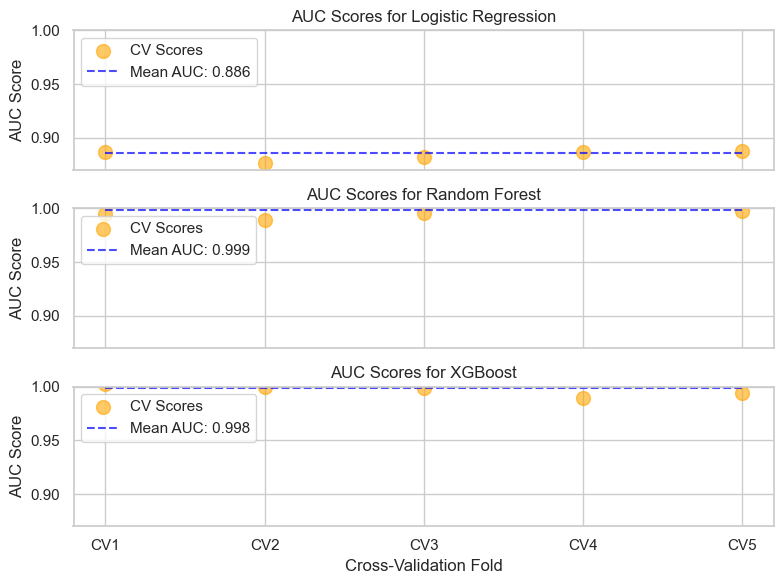

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the plot style
sns.set(style='whitegrid')

# Prepare data for the subplots
models = cv_results_df["Model"].values
mean_auc = cv_results_df["Mean AUC Score"].values
cv_scores = np.array([row[2] for row in cv_results_df.itertuples()])  # Accessing Cross-Validated AUC Scores

# Create a grid of subplots
n_models = len(models)
x_folds = np.arange(1, 6)  # Folds CV1 to CV5
jitter = np.random.normal(0, 0.005, (n_models, 5))  # Generate jitter for all models at once

# Create subplots
fig, axes = plt.subplots(n_models, 1, figsize=(8, 6), sharex=True)

# Plotting each model in a loop
for i, ax in enumerate(axes):
    ax.scatter(x_folds, cv_scores[i] + jitter[i], color='orange', alpha=0.6, s=100, label='CV Scores')
    ax.hlines(mean_auc[i], xmin=1, xmax=5, linestyle='--', color='blue', alpha=0.7, label=f'Mean AUC: {mean_auc[i]:.3f}')
    
    ax.set(title=f'AUC Scores for {models[i]}', ylabel='AUC Score', ylim=(0.87, 1))
    ax.legend(loc='upper left')
    ax.grid(True)

# Common x-axis label
plt.xlabel('Cross-Validation Fold')
plt.xticks(x_folds, [f'CV{i}' for i in x_folds])
plt.tight_layout()
plt.show()


Having both AUC and ROC scores above 0.99 suggests that your model is performing exceptionally well! This means that your model can very accurately distinguish between the positive class (churn) and the negative class (non-churn), even across different decision thresholds. However, such a high score can sometimes indicate potential overfitting, depending on the nature of the data and the complexity of the model.

In [55]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assume X_train and y_train are already defined as per the earlier context.
# Extracting the Random Forest model from the dictionary
random_forest_model = models["Random Forest"]

# Train the Random Forest model
random_forest_model.fit(X, y)

# Extract feature importances
importances = random_forest_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show the top 10 important features
top_10_features = feature_importance.head(10)
print(top_10_features)

                 Feature  Importance
0                 Tenure    0.237259
2        WarehouseToHome    0.103277
4        NumberOfAddress    0.083283
8      DaySinceLastOrder    0.081495
5               Complain    0.068722
3      SatisfactionScore    0.065635
7             OrderCount    0.041692
6             CouponUsed    0.036406
1               CityTier    0.032049
24  MaritalStatus_Single    0.029968


In [61]:
# df_eda[['Tenure', 
#     'WarehouseToHome', 
#     'NumberOfAddress', 
#     'DaySinceLastOrder', 
#     'Complain', 
#     'SatisfactionScore', 
#     'OrderCount', 
#     'CouponUsed', 
#     'CityTier', 
#     'MaritalStatus_Single']]

In [58]:
def filter_col(l1,l2):
    l3 = []
    for item in l1:
        if item in l2:
            l3.append(item)
        elif item.split('_')[0] in l2:
            l3.append(item.split('_')[0]) 
    return l3

In [75]:
top_feature_cols = filter_col(list(feature_importance[:10]['Feature']),list(df_eda.columns))
customer_segments = df_eda[top_feature_cols]

In [76]:
customer_segments.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'DaySinceLastOrder',
       'Complain', 'SatisfactionScore', 'OrderCount', 'CouponUsed', 'CityTier',
       'MaritalStatus'],
      dtype='object')

In [77]:
import pickle

# Extract the Random Forest model after SMOTE from the models dictionary
rf_model_after_smote = models["Random Forest"]

# Save the trained Random Forest model to a pickle file
with open('random_forest_model_after_smote.pkl', 'wb') as file:
    pickle.dump(rf_model_after_smote, file)

# print("The Random Forest model trained after SMOTE has been saved to 'random_forest_model_after_smote.pkl'.")

The Random Forest model trained after SMOTE has been saved to 'random_forest_model_after_smote.pkl'.


For the part below this section, app we be desinged using python flask

In [228]:
import pickle
import pandas as pd

# Step 1: Load the trained Random Forest model from the pickle file
with open('random_forest_model_after_smote.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

In [226]:
# Sample data
# Step 2: Prepare user input data in the same format as training data

# customer 1 to not churn
# user_input_data = {
#     'Tenure': [0],
#     'WarehouseToHome': [22],
#     'NumberOfAddress': [22],
#     'DaySinceLastOrder': [6],
#     'Complain': [1],
#     'SatisfactionScore': [5],
#     'OrderCount': [1],
#     'CouponUsed': [1],
#     'CityTier': [3],
#     'MaritalStatus': ['Single'],  # Example input
#     'PreferredLoginDevice': ['Phone'],  # Example input
#     'PreferredPaymentMode': ['CC'],  # Example input
#     'Gender': ['Male'],
#     'PreferedOrderCat': ['Laptop & Accessory']  # Example input
# }

# customer 2 to not churn
# user_input_data = {
#     'Tenure': [1],  # Very short tenure
#     'WarehouseToHome': [30],  # Long delivery distance
#     'NumberOfAddress': [1],  # Limited addresses, indicating lower engagement
#     'DaySinceLastOrder': [90],  # Long time since the last order
#     'Complain': [1],  # Customer has lodged a complaint
#     'SatisfactionScore': [1],  # Very low satisfaction score
#     'OrderCount': [2],  # Very few orders overall
#     'CouponUsed': [3],  # Frequent coupon usage might indicate price sensitivity
#     'CityTier': [2],  # Middle-tier city, potentially higher competition
#     'MaritalStatus': ['Single'],  # Customer's marital status
#     'PreferredLoginDevice': ['Mobile'],  # Device used for logging in
#     'PreferredPaymentMode': ['Cash on Delivery'],  # Payment method often used by less engaged customers
#     'Gender': ['Female'],  # Gender of the customer
#     'PreferedOrderCat': ['Grocery']  # Category the customer orders from most
# }

# customer 1 to churn

# user_input_data = {
#     'Tenure': [0],  # Very short tenure indicating new customer
#     'WarehouseToHome': [25],  # Long delivery distance
#     'NumberOfAddress': [1],  # Very few addresses, indicating less engagement
#     'DaySinceLastOrder': [60],  # Long time since the last order
#     'Complain': [1],  # Customer has complained
#     'SatisfactionScore': [1],  # Very low satisfaction score
#     'OrderCount': [1],  # Very few total orders
#     'CouponUsed': [5],  # High coupon usage, indicating price sensitivity
#     'CityTier': [1],  # Lower-tier city with potentially less competition
#     'MaritalStatus': ['Single'],  # Customer's marital status
#     'PreferredLoginDevice': ['Mobile'],  # Device used for logging in
#     'PreferredPaymentMode': ['Cash on Delivery'],  # Payment method often used by less engaged customers
#     'Gender': ['Female'],  # Gender of the customer
#     'PreferedOrderCat': ['Electronics']  # A different category that may indicate lower loyalty
# }

# customer 2 to churn
user_input_data = {
    'Tenure': [0],  # Very short tenure
    'WarehouseToHome': [30],  # Long delivery distance (30 km)
    'NumberOfAddress': [1],  # Only one address on file
    'DaySinceLastOrder': [120],  # 120 days since the last order
    'Complain': [1],  # Customer has previously complained
    'SatisfactionScore': [1],  # Very low satisfaction score
    'OrderCount': [2],  # Very few orders (2)
    'CouponUsed': [5],  # High coupon usage (5)
    'CityTier': [1],  # Lower-tier city (1)
    'MaritalStatus': ['Single'],  # Example input
    'PreferredLoginDevice': ['Mobile'],  # Using a mobile device for login
    'PreferredPaymentMode': ['Cash on Delivery'],  # Prefers cash on delivery
    'Gender': ['Female'],  # Female customer
    'PreferedOrderCat': ['Fashion']  # Example input
}


In [227]:
import pandas as pd

# Step 3: Convert input data to a DataFrame
user_df = pd.DataFrame(user_input_data)

# Step 4: Transform categorical columns using one-hot encoding to match the model's expected features
user_df = pd.get_dummies(user_df, columns=['MaritalStatus', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat'])

# Step 5: Get the feature names from the model training
trained_feature_names = loaded_rf_model.feature_names_in_

# Step 6: Ensure all columns expected by the model are present in the DataFrame, set missing ones to zero
for col in trained_feature_names:
    if col not in user_df.columns:
        user_df[col] = 0

# Reorder columns to match the order used during training
user_df = user_df[trained_feature_names]

# Step 7: Use the loaded model to predict churn
y_pred = loaded_rf_model.predict(user_df)

# Step 8: Get the probability of churn (percentage)
y_proba = loaded_rf_model.predict_proba(user_df)

# Output the prediction and the probability of churn
for idx, prediction in enumerate(y_pred):
    churn_status = "Likely to Churn" if prediction == 1 else "Likely to Not Churn"
    churn_probability = y_proba[idx][1] * 100  # Convert to percentage
    
    print(f"Customer {idx + 1}: {churn_status} with a probability of churn {churn_probability:.2f}%")
    
    # Only print suggestions if the customer is likely to churn
    if prediction == 1:  # Customer is likely to churn
        print("\nActionable Suggestions for Marketing Team to Reduce Churn:")
        
        # Suggestions mapping
        suggestions = {
            'Tenure': "Engage the customer through targeted loyalty programs to increase their tenure.",
            'SatisfactionScore': "Conduct a survey to gather feedback and improve customer satisfaction.",
            'Complain': "Implement a proactive outreach strategy for customers with complaints to resolve issues quickly.",
            'DaySinceLastOrder': "Send reminders or incentives to encourage more frequent orders from customers.",
            'CouponUsed': "Analyze coupon usage patterns; consider offering personalized promotions to high-usage customers.",
            'WarehouseToHome': "Evaluate delivery times and explore options to enhance the efficiency of the delivery process.",
            'NumberOfAddress': "Encourage customers to update their addresses for better service delivery options.",
            'OrderCount': "Increase engagement with targeted marketing campaigns based on order history.",
            'CityTier': "Customize offers based on city tier to enhance relevance and customer engagement."
        }

        # Check feature importance and user input dynamically
        for feature in suggestions.keys():
            if feature in trained_feature_names:
                # You can modify conditions based on user_df values to be more specific
                if feature == 'SatisfactionScore' and user_df['SatisfactionScore'].values[0] < 3:
                    print(f"- {suggestions[feature]}")
                elif feature == 'Complain' and user_df['Complain'].values[0] == 1:
                    print(f"- {suggestions[feature]}")
                elif feature == 'DaySinceLastOrder' and user_df['DaySinceLastOrder'].values[0] > 60:
                    print(f"- {suggestions[feature]}")
                elif feature == 'CouponUsed' and user_df['CouponUsed'].values[0] > 3:
                    print(f"- {suggestions[feature]}")
                else:
                    print(f"- {suggestions[feature]}")

        print("\n")

Customer 1: Likely to Churn with a probability of churn 54.00%

Actionable Suggestions for Marketing Team to Reduce Churn:
- Engage the customer through targeted loyalty programs to increase their tenure.
- Conduct a survey to gather feedback and improve customer satisfaction.
- Implement a proactive outreach strategy for customers with complaints to resolve issues quickly.
- Send reminders or incentives to encourage more frequent orders from customers.
- Analyze coupon usage patterns; consider offering personalized promotions to high-usage customers.
- Evaluate delivery times and explore options to enhance the efficiency of the delivery process.
- Encourage customers to update their addresses for better service delivery options.
- Increase engagement with targeted marketing campaigns based on order history.
- Customize offers based on city tier to enhance relevance and customer engagement.




why feature selection?

why this model?

recall is important for this project?

it is okay to predict the customer would be churned even if customer is not churning becuase we would atmost give them proirity ehich is good for them, however if we predict non churn for the customer who would be churned then we will loose the customer.
Accuracy is high because data is very limited.

Result finding:
how: predict customer likely to churn -> personalized strategy or marketing to retain those group of customer  


Limitations:


data limitation
cutting edges models
personalized solutions could be made

Further research:

more data
cutting edges models
personalized solutions could be made

small scale

In [234]:
hmap = {}
for i in categorical_df.columns:
    hmap[i] = list(categorical_df[i].unique())

In [235]:
hmap

{'PreferredLoginDevice': ['Mobile Phone', 'Phone', 'Computer'],
 'PreferredPaymentMode': ['Debit Card',
  'UPI',
  'CC',
  'Cash on Delivery',
  'E wallet',
  'COD',
  'Credit Card'],
 'Gender': ['Female', 'Male'],
 'PreferedOrderCat': ['Laptop & Accessory',
  'Mobile',
  'Mobile Phone',
  'Others',
  'Fashion',
  'Grocery'],
 'MaritalStatus': ['Single', 'Divorced', 'Married']}